# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

> We are being asked to build a machine learning model to predict whether a TikTok video presents a "claim" or presents an "opinion".\
We should consider the following metrics that are relevant to the specific goals and requirements of project:
> - Precission, Recall, F1, Accuracy score
> - Area Under the ROC Curve (AUC-ROC)


2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?
  
  > 
  

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?
  
  >

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np


# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

# Import packages for data modeling
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost Classifier
from xgboost import XGBClassifier
# This is the function that helps plot feature importance 
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data=data.dropna()

In [10]:
# Display first few rows after handling missing values
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Check for and handle duplicates.

In [11]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Check for and handle outliers.

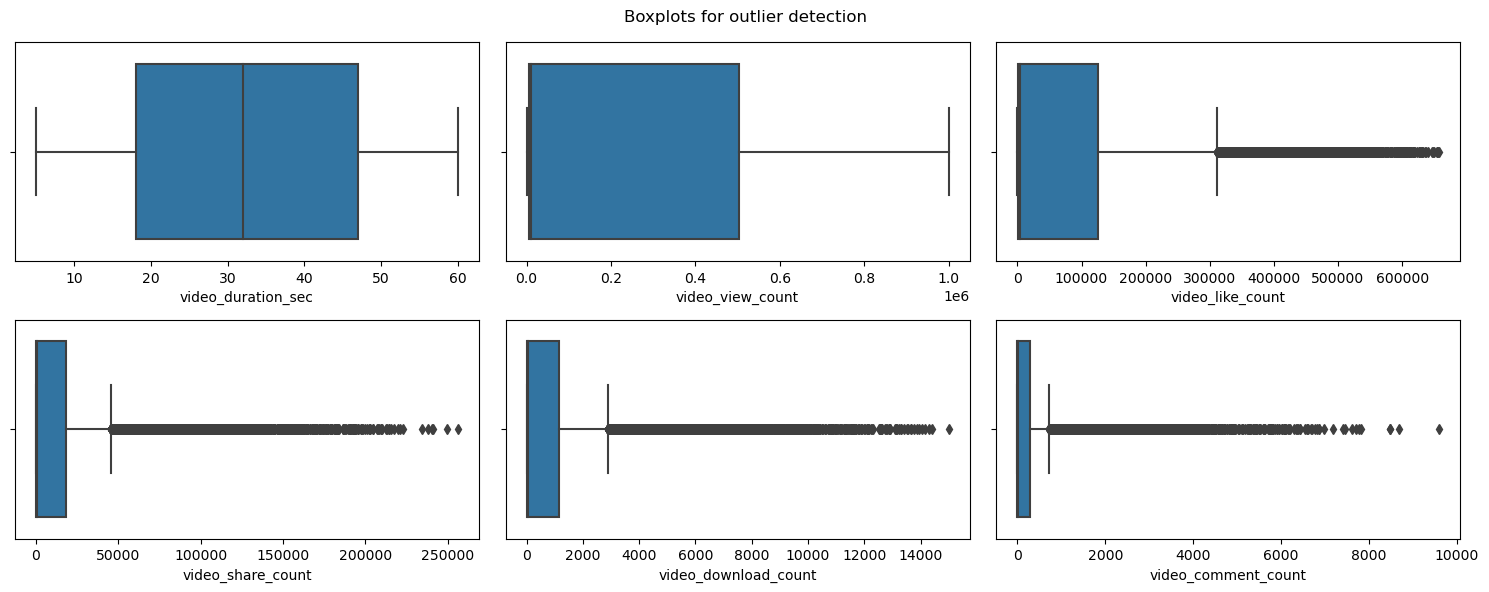

In [12]:
### Boxplots for outlier detection ###    
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=data['video_duration_sec'])
sns.boxplot(ax=axes[0,1], x=data['video_view_count'])
sns.boxplot(ax=axes[0,2], x=data['video_like_count'])
sns.boxplot(ax=axes[1,0], x=data['video_share_count'])
sns.boxplot(ax=axes[1,1], x=data['video_download_count'])
sns.boxplot(ax=axes[1,2], x=data['video_comment_count'])
plt.tight_layout()
plt.show()

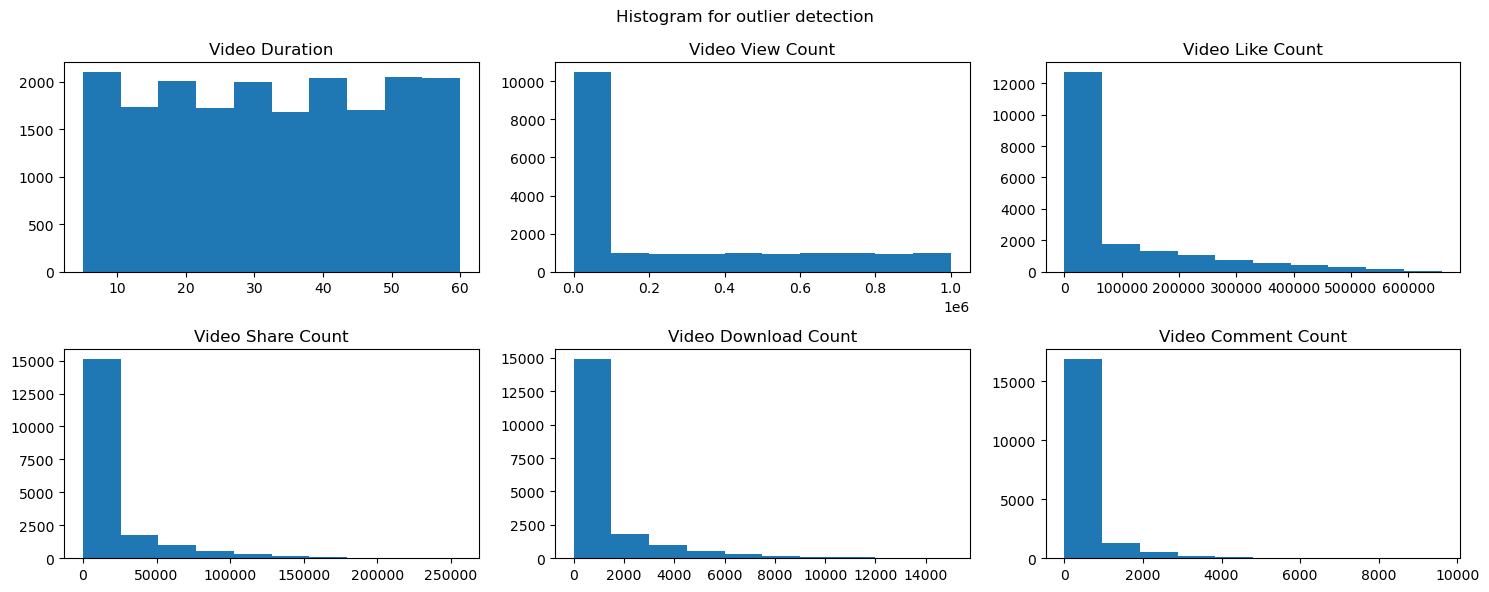

In [13]:
### Histogram for outlier detection ###  

columns_to_check = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
                    'video_download_count', 'video_comment_count']

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.suptitle('Histogram for outlier detection')
axes[0,0].hist(x=data['video_duration_sec'])
axes[0,0].set_title('Video Duration')
axes[0,1].hist(data['video_view_count'])
axes[0,1].set_title('Video View Count')
axes[0,2].hist(data['video_like_count'])
axes[0,2].set_title('Video Like Count')
axes[1,0].hist(data['video_share_count'])
axes[1,0].set_title('Video Share Count')
axes[1,1].hist(data['video_download_count'])
axes[1,1].set_title('Video Download Count')
axes[1,2].hist(data['video_comment_count'])
axes[1,2].set_title('Video Comment Count')

plt.tight_layout()
plt.show()

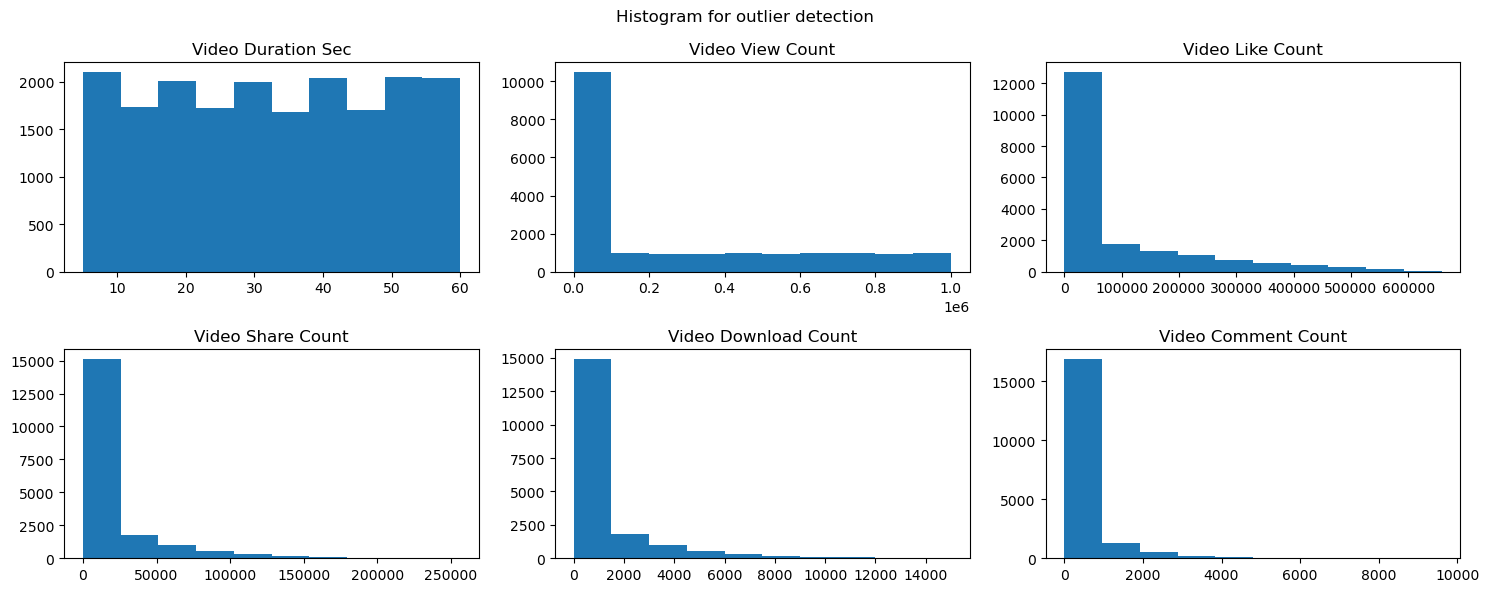

In [14]:
### Histogram for outlier detection ###  
columns_to_check = ['video_duration_sec', 'video_view_count', 'video_like_count', 
                    'video_share_count', 'video_download_count', 'video_comment_count']

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.suptitle('Histogram for outlier detection')

for i, col in enumerate(columns_to_check):
    ax = axes[i // 3, i % 3]  # Calculate subplot index
    ax.hist(data[col])
    ax.set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

In [15]:
columns_to_check = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
                    'video_download_count', 'video_comment_count']
# Calculate summary statistics
summary_stats = data[columns_to_check].describe()

# Calculate IQR for each column
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
max_ = summary_stats.loc['max']
IQR = Q3 - Q1

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
have_outliers = max_ > upper_bound

# Display potential outliers
outliers = ((data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)).any(axis=1)
potential_outliers = data[outliers][columns_to_check]

# Create a new DataFrame to store summary statistics and outlier information
outlier_info = pd.DataFrame({
    'IQR(Q3-Q1)': IQR,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,    
    'Have Outliers': have_outliers
})

# Transpose the outlier_info DataFrame to match the shape of summary_stats
outlier_info = outlier_info.transpose()

# Combine summary statistics and outlier information
summary_stats = pd.concat([summary_stats, outlier_info])

# Display the combined DataFrame
summary_stats

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0
mean,32.423811,254708.558688,84304.63603,16735.248323,1049.429627,349.312146
std,16.22647,322893.280814,133420.546814,32036.17435,2004.299894,799.638865
min,5.0,20.0,0.0,0.0,0.0,0.0
25%,18.0,4942.5,810.75,115.0,7.0,1.0
50%,32.0,9954.5,3403.5,717.0,46.0,9.0
75%,47.0,504327.0,125020.0,18222.0,1156.25,292.0
max,60.0,999817.0,657830.0,256130.0,14994.0,9599.0
IQR(Q3-Q1),29.0,499384.5,124209.25,18107.0,1149.25,291.0
Lower Bound,-25.5,-744134.25,-185503.125,-27045.5,-1716.875,-435.5


In [16]:
potential_outliers

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
5,35,336647.0,175546.0,62303.0,4293.0,1857.0
6,16,750345.0,486192.0,193911.0,8616.0,5446.0
9,45,931587.0,171051.0,67739.0,4104.0,2540.0
11,30,482046.0,168107.0,19474.0,3282.0,532.0
12,51,700081.0,434565.0,97995.0,2408.0,1411.0
...,...,...,...,...,...,...
9596,52,605938.0,282400.0,83374.0,890.0,192.0
9597,33,885151.0,568550.0,79845.0,9700.0,2875.0
9603,49,737177.0,460743.0,54550.0,8119.0,3372.0
9604,9,546987.0,360080.0,79346.0,4537.0,2432.0


In [17]:
"""
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
"""
def imputation(column_list,k):
    bold_text = '\033[1m'
    reset_format = '\033[0m'
    for i in column_list:       
        # Reassign minimum to zero
        negative_items = sum(data[i]<0)
        data[i] = data[i].apply(lambda x: max(x, 0))
        
        # Calculate upper threshold
        '''
        Calculate the upper threshold for identifying outliers using the IQR method.
        '''
        q3 = np.percentile(data[i], 75)
        q1 = np.percentile(data[i], 25)
        iqr = q3 - q1
        upper_threshold = q3 + k * iqr   
        count_upper = sum(data[i] > upper_threshold)
        
        # Reassign values > threshold to threshold
        data[i] = np.minimum(data[i], upper_threshold)
        print(f'Imputation for {bold_text}{i}{reset_format}:')
        print('Reassign',negative_items ,'negative items to zero')
        print('IQR =', iqr)
        print(f'Upper threshold (Q3 + {k}*IQR): {upper_threshold}')
        print(f'There are {count_upper} videos with {i} higher than the Upper threshold')
        print()
        print(data[i].describe())
        print()
    return

**Notes**:
Handling outliers is not typically necessary for tree-based models like Random Forest and XGBoost. Tree-based models are robust to outliers because they partition the feature space into regions and make predictions based on the majority class or average target value within each region.

Outliers can still affect the performance of the model by introducing noise, but tree-based models are generally able to handle them well. In fact, removing outliers might lead to loss of information and potentially bias the model.

In [18]:
### We will not impute outliers as below ###

# column_have_outliers = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
#                         'video_download_count', 'video_comment_count']
# imputation(column_have_outliers,3)

Check class balance.

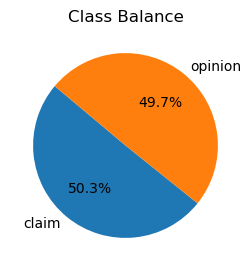

In [19]:
# Check class balance
class_counts = data['claim_status'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Balance');

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [20]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].apply(lambda x: len(str(x)))

Calculate the average text_length for claims and opinions.

In [21]:
# Calculate the average text_length for claims and opinions
average_text_length = data.groupby('claim_status')['text_length'].mean()
average_text_length

claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

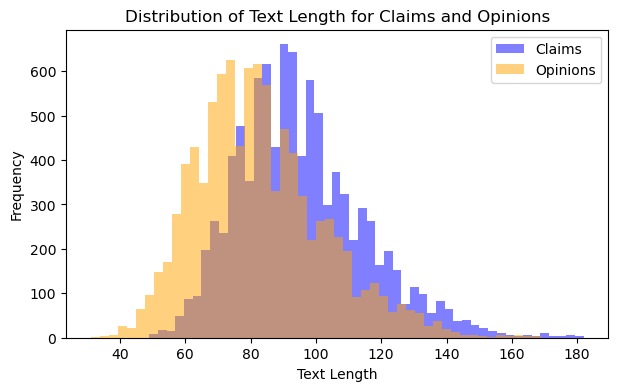

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

# Filter the DataFrame for claims and opinions
claims_text_length = data[data['claim_status'] == 'claim']['text_length']
opinions_text_length = data[data['claim_status'] == 'opinion']['text_length']

# Create histograms
plt.figure(figsize=(7, 4))
plt.hist(claims_text_length, bins=50, alpha=0.5, label='Claims', color='blue')
plt.hist(opinions_text_length, bins=50, alpha=0.5, label='Opinions', color='orange')

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Claims and Opinions')
plt.legend()

# Show plot
plt.show()

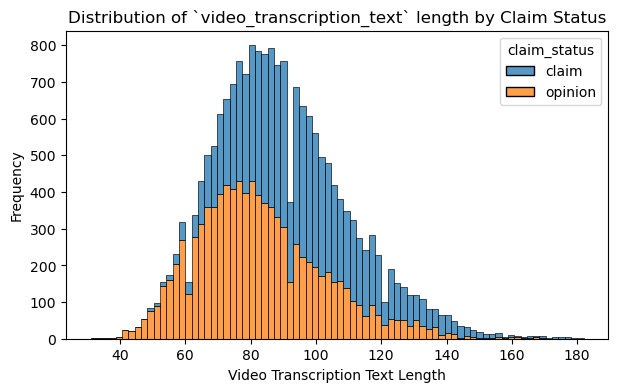

In [23]:
plt.figure(figsize=(7, 4))
sns.histplot(x='text_length', multiple = 'stack', data = data,
             hue='claim_status')
# Set plot title and subtitle
plt.title("Distribution of `video_transcription_text` length by Claim Status")
plt.xlabel("Video Transcription Text Length")
plt.ylabel("Frequency")

# Show the plot
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [24]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_length                   int64
dtype: object

In [25]:
# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
columns_to_drop = ['#','video_id','video_transcription_text']
X = X.drop(columns=columns_to_drop)

# Encode target variable
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# X['claim_status'] = label_encoder.fit_transform(X['claim_status'])

X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X,drop_first=True)

In [26]:
X.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [27]:
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,80


### **Task 4: Split the data**

Assign target variable.

In [28]:
# Isolate target variable
y = X['claim_status']

Isolate the features.

In [29]:
# Isolate features
X = X.drop(columns =['claim_status'])

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [30]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [31]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [32]:
# Get shape of each training, validation, and testing set

print(X_train.shape, X_val.shape, X_test.shape,
      y_train.shape, y_val.shape, y_test.shape)

(11450, 10) (3817, 10) (3817, 10) (11450,) (3817,) (3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [33]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune

# cv_params = {'max_depth': [2,4,5, None], 
#              'min_samples_leaf': [1,2,3],
#              'min_samples_split': [2,3,4],
#              'max_features': [3,4],
#              'n_estimators': [75, 100, 150]
#              }  

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

We can search best parameter with *custom_split*:

In [34]:
# # Create list of split indices.
# split_index = [0 if x in X_val.index else -1 for x in X_train.index]
# custom_split = PredefinedSplit(split_index)

# # Instantiate model.
# rf = RandomForestClassifier(random_state=0)

# # Search over specified parameters.
# rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1')

In [35]:
%%time
# Fit the model.
rf_cv.fit(X_train, y_train)

CPU times: user 5min 5s, sys: 623 ms, total: 5min 6s
Wall time: 5min 6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [36]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [37]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9908534395531852

Call `make_results()` on the GridSearch object.

In [38]:
rf_results = make_results('Random Forest CV', rf_cv, 'recall')
rf_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999479,0.990853,0.995143,0.995109


In [39]:
# Examine best parameters
best_params = rf_cv.best_params_
best_params

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [40]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [41]:
# Pickle the model
with open(path+'rf_cv.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [42]:
# Open pickled model
with open(path+'rf_cv.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [43]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
# cv_params = {'max_depth': [4,6,8], 
#              'min_child_weight': [2,4,5],
#              'learning_rate': [0.1, 0.2, 0.3],
#              'n_estimators': [ 20, 50, 100]
# #             'subsample': [0.7],
# #             'colsample_bytree': [0.7]
#              } 

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }


# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [44]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 6min 13s, sys: 2.25 s, total: 6min 16s
Wall time: 3min 12s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [45]:
# Examine best recall score
xgb_cv.best_score_

0.9906808769992594

In [46]:
# Examine best parameters
best_params = rf_cv.best_params_
best_params

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [47]:
# Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
xgb_results = make_results('XGBoost CV', xgb_cv, 'recall')
xgb_results

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.999652,0.990681,0.995142,0.995109


In [61]:
pd.concat([rf_results,xgb_results])

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999479,0.990853,0.995143,0.995109
0,XGBoost CV,0.999652,0.990681,0.995142,0.995109


**Question:** How well does your model perform? Consider recall score and precision score.
> Both models demonstrate excellent performance across all metrics, suggesting that they are effective at predicting the target variable. There is a slighly higher from recall and F1 score for Random Forest model.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [48]:
# Use the random forest "best estimator" model to get predictions on the encoded validation set
### YOUR CODE HERE ###
rf_preds = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [49]:
# Display the predictions on the encoded validation set
### YOUR CODE HERE ###
rf_preds

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [50]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

<Figure size 300x300 with 0 Axes>

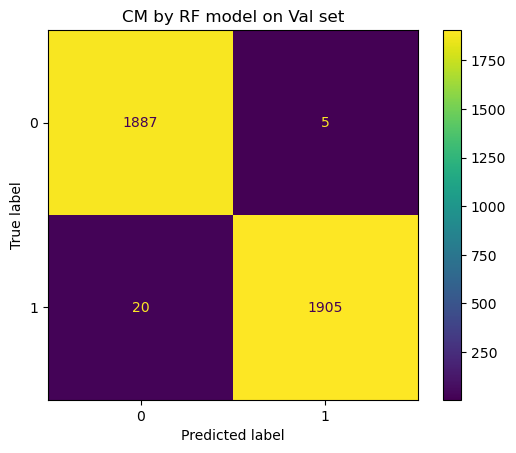

In [51]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
cm = confusion_matrix(y_val, rf_preds, labels=rf_cv.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_cv.classes_)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
disp.plot(values_format='')
plt.title('CM by RF model on Val set')

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [52]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, rf_preds, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [53]:
#Evaluate XGBoost model
xgb_preds = xgb_cv.best_estimator_.predict(X_val)

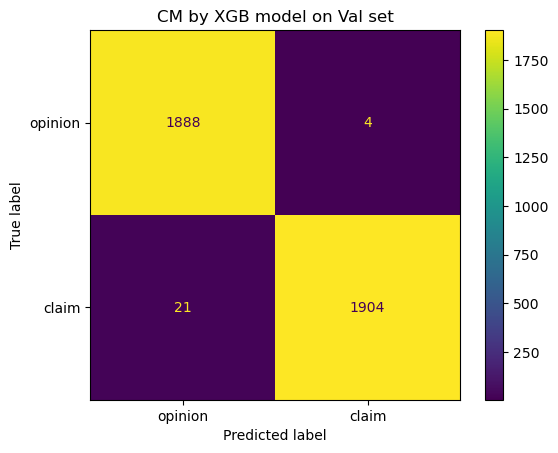

In [54]:
target_labels = ['opinion', 'claim']

cm = confusion_matrix(y_val, xgb_preds, labels=xgb_cv.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=target_labels)

# Plot confusion matrix
disp.plot(values_format='')
plt.title('CM by XGB model on Val set')

# Display plot
plt.show()

In [55]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, xgb_preds, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [56]:
### YOUR CODE HERE ###
rf_preds = rf_cv.best_estimator_.predict(X_test)

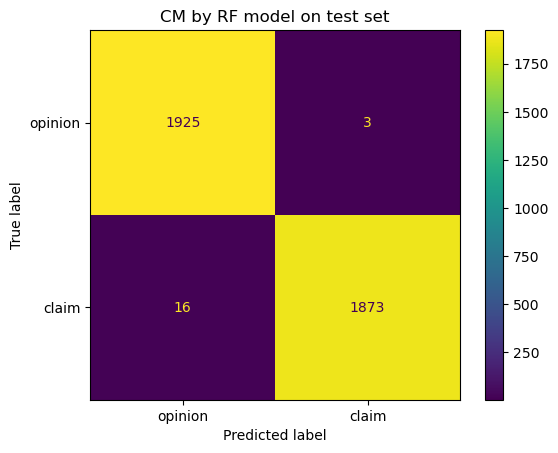

In [57]:
target_labels = ['opinion', 'claim']
# Compute values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf_cv.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=target_labels)

# Plot confusion matrix
disp.plot(values_format='')
plt.title('CM by RF model on test set')

# Display plot
### YOUR CODE HERE ###
plt.show()

#### **Feature importances of champion model**


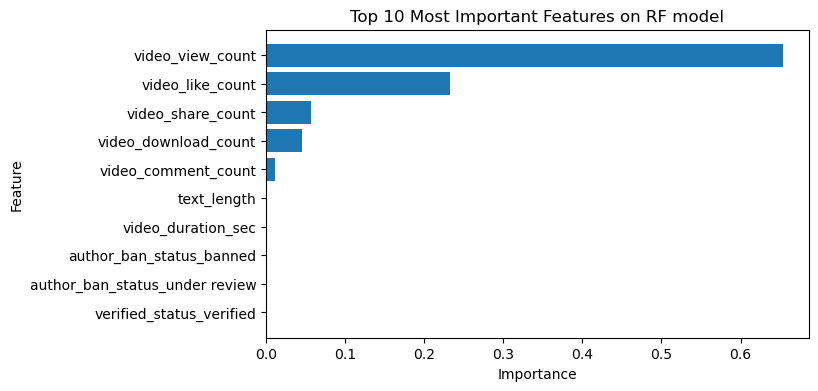

In [58]:
# Get feature importances
feature_importances = rf_cv.best_estimator_.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the most important features
plt.figure(figsize=(7, 4))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features on RF model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

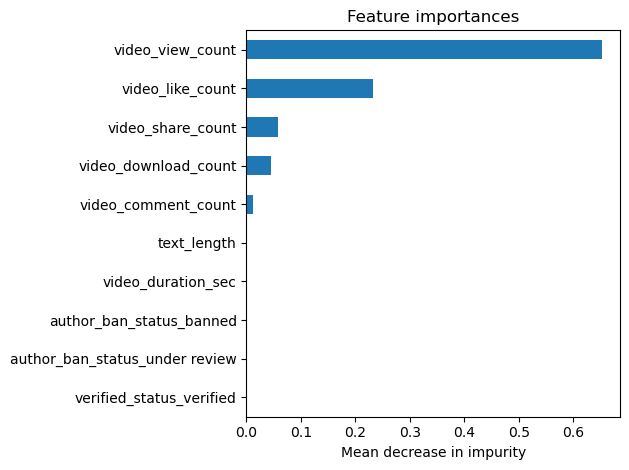

In [59]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

# Sort feature importances in descending order
rf_importances_sorted = rf_importances.sort_values(ascending=True)

fig, ax = plt.subplots()
rf_importances_sorted.plot.barh(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Mean decrease in impurity')
# plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
fig.tight_layout()
plt.show()

In [60]:
print(feature_importance_df)

                          Feature  Importance
1                video_view_count    0.653320
2                video_like_count    0.232455
3               video_share_count    0.056994
4            video_download_count    0.045059
5             video_comment_count    0.011255
6                     text_length    0.000443
0              video_duration_sec    0.000241
8        author_ban_status_banned    0.000204
9  author_ban_status_under review    0.000029
7        verified_status_verified    0.000000


**Question:** Describe your most predictive features. Were your results surprising?

> The top 3 feature importances are `video_view_count`,`video_like_count`,`video_like_count` indicating that they contribute the most to the predictive power of the model.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

> Yes we can recommend using Random Forest model as the metrics for both Valuation and Test dataset are consistenly high. I can help to predict `claim` and `opinion` video. 

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

> The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.